# Hypothesis Testing solution 

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [302]:
Loan_Data = pd.read_csv('LoansData.csv')

In [303]:
Price_Quotes = pd.read_csv('Price_Quotes.csv')

In [304]:
Priority_Assessment = pd.read_csv('Priority_Assessment.csv')

In [305]:
Treatment_Facility = pd.read_csv('Treatment_Facility.csv')

In [306]:
Films = pd.read_csv('Films.csv')

#BUSINESS PROBLEM-1


In [307]:
Loan_Data.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [308]:
Loan_Data.rename(columns = {'Interest.Rate':'Int_Rate','Amount.Requested':'Amt_Rqstd','Amount.Funded.By.Investors':'Amt_Invstd',
                            'Loan.Length':'period', 'Loan.Purpose':'Purpose', 'Debt.To.Income.Ratio':'Debt_2_ratio',
                            'Home.Ownership':'Ownership','Monthly.Income':'Income','FICO.Range':'FICO_Range',
                            'Open.CREDIT.Lines':'Open_crdt_lne', 'Revolving.CREDIT.Balance':'Balance', 'Inquiries.in.the.Last.6.Months':'Inquiries',
                            'Employment.Length':'Empymnt_Len'},inplace=True)

In [309]:
Loan_Data.head(2)

,Amt_Rqstd,Amt_Invstd,Int_Rate,period,Purpose,Debt_2_ratio,State,Ownership,Income,FICO_Range,Open_crdt_lne,Balance,Inquiries,Empymnt_Len
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [310]:
Loan_Data.shape

(2500, 14)

In [311]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Amt_Rqstd      2499 non-null   float64
 1   Amt_Invstd     2499 non-null   float64
 2   Int_Rate       2498 non-null   object 
 3   period         2500 non-null   object 
 4   Purpose        2500 non-null   object 
 5   Debt_2_ratio   2499 non-null   object 
 6   State          2500 non-null   object 
 7   Ownership      2499 non-null   object 
 8   Income         2499 non-null   float64
 9   FICO_Range     2498 non-null   object 
 10  Open_crdt_lne  2497 non-null   float64
 11  Balance        2497 non-null   float64
 12  Inquiries      2497 non-null   float64
 13  Empymnt_Len    2423 non-null   object 
dtypes: float64(6), object(8)
memory usage: 273.6+ KB


In [312]:
Loan_Data.isnull().sum()

Amt_Rqstd         1
Amt_Invstd        1
Int_Rate          2
period            0
Purpose           0
Debt_2_ratio      1
State             0
Ownership         1
Income            1
FICO_Range        2
Open_crdt_lne     3
Balance           3
Inquiries         3
Empymnt_Len      77
dtype: int64

In [313]:
Num_col = ['Amt_Rqstd', 'Amt_Invstd', 'Income', 'Open_crdt_lne', 'Balance' , 'Inquiries' ]
Cat_col = ['Int_Rate', 'Debt_2_ratio', 'Ownership', 'FICO_Range', 'Empymnt_Len' ]

In [314]:
for col in Cat_col:
    mode_val = Loan_Data[col].mode().values[0]
    Loan_Data[col].fillna(mode_val, inplace = True)

for col in Num_col:
    mean_val = Loan_Data[col].mean()
    Loan_Data[col].fillna(mean_val, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11688\955351214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan_Data[col].fillna(mode_val, inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11688\955351214.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [315]:
Loan_Data.isnull().sum()

Amt_Rqstd        0
Amt_Invstd       0
Int_Rate         0
period           0
Purpose          0
Debt_2_ratio     0
State            0
Ownership        0
Income           0
FICO_Range       0
Open_crdt_lne    0
Balance          0
Inquiries        0
Empymnt_Len      0
dtype: int64

In [316]:
Loan_Data['Int_Rate']=Loan_Data['Int_Rate'].str.strip("%").astype(float)

In [317]:
Loan_Data['Debt_2_ratio']=Loan_Data['Debt_2_ratio'].str.strip("%").astype(float)

In [318]:
Range=Loan_Data['FICO_Range'].str.split("-",expand=True).astype(float)
Range.columns=['lower', 'upper']
Loan_Data['F_score'] = (Range.lower+Range.upper)/2

In [319]:
Loan_Data.drop(columns='FICO_Range',inplace=True)

In [320]:
Loan_Data.head(2)

,Amt_Rqstd,Amt_Invstd,Int_Rate,period,Purpose,Debt_2_ratio,State,Ownership,Income,Open_crdt_lne,Balance,Inquiries,Empymnt_Len,F_score
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,< 1 year,737.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2 years,717.0


In [321]:
Loan_Data.shape

(2500, 14)

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
lbl_encoder=LabelEncoder()

In [324]:
Loan_Data['Encoded_period'] = lbl_encoder.fit_transform(Loan_Data[['period']])


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [325]:
Loan_Data.drop(columns='period', inplace=True)


In [326]:
Loan_Data.shape

(2500, 14)

In [327]:
Loan_Data['Encoded_Purpose'] = lbl_encoder.fit_transform(Loan_Data[['Purpose']])
Loan_Data.drop(columns='Purpose', inplace=True)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [328]:
Loan_Data['Encoded_Ownership'] = lbl_encoder.fit_transform(Loan_Data[['Ownership']])
Loan_Data.drop(columns='Ownership', inplace=True)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [329]:
Loan_Data.drop(columns=['State','Empymnt_Len'],inplace=True)

In [330]:
Loan_Data.describe()

,Amt_Rqstd,Amt_Invstd,Int_Rate,Debt_2_ratio,Income,Open_crdt_lne,Balance,Inquiries,F_score,Encoded_period,Encoded_Purpose,Encoded_Ownership
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,12405.462185,12002.374186,13.064632,15.374268,5688.931321,10.072887,15223.184622,0.906688,707.876000,0.219200,3.369600,2.078000
std,7801.372299,7745.217219,4.175615,7.509853,3962.325165,4.504710,18270.038964,1.230410,35.042886,0.413787,3.107935,1.935514
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000,642.000000,0.000000,0.000000,0.000000
25%,6000.000000,6000.000000,10.160000,9.747500,3500.000000,7.000000,5589.250000,0.000000,682.000000,0.000000,2.000000,0.000000
50%,10000.000000,10000.000000,13.110000,15.320000,5000.000000,9.000000,10977.500000,0.906688,702.000000,0.000000,2.000000,3.000000
75%,17000.000000,16000.000000,15.800000,20.672500,6800.000000,13.000000,18843.750000,1.000000,727.000000,0.000000,4.000000,4.000000
max,35000.000000,35000.000000,24.890000,34.910000,102750.000000,38.000000,270800.000000,9.000000,832.000000,1.000000,13.000000,4.000000


In [331]:
Loan_Data.head()

,Amt_Rqstd,Amt_Invstd,Int_Rate,Debt_2_ratio,Income,Open_crdt_lne,Balance,Inquiries,F_score,Encoded_period,Encoded_Purpose,Encoded_Ownership
0,20000.0,20000.0,8.90,14.90,6541.67,14.0,14272.0,2.0,737.0,0,2,0
1,19200.0,19200.0,12.12,28.36,4583.33,12.0,11140.0,1.0,717.0,0,2,0
2,35000.0,35000.0,21.98,23.81,11500.00,14.0,21977.0,1.0,692.0,1,2,0
3,10000.0,9975.0,9.99,14.30,3833.33,10.0,9346.0,0.0,697.0,0,2,0
4,12000.0,12000.0,11.71,18.78,3195.00,11.0,14469.0,0.0,697.0,0,1,4


In [332]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amt_Rqstd          2500 non-null   float64
 1   Amt_Invstd         2500 non-null   float64
 2   Int_Rate           2500 non-null   float64
 3   Debt_2_ratio       2500 non-null   float64
 4   Income             2500 non-null   float64
 5   Open_crdt_lne      2500 non-null   float64
 6   Balance            2500 non-null   float64
 7   Inquiries          2500 non-null   float64
 8   F_score            2500 non-null   float64
 9   Encoded_period     2500 non-null   int32  
 10  Encoded_Purpose    2500 non-null   int32  
 11  Encoded_Ownership  2500 non-null   int32  
dtypes: float64(9), int32(3)
memory usage: 205.2 KB


<Axes: >

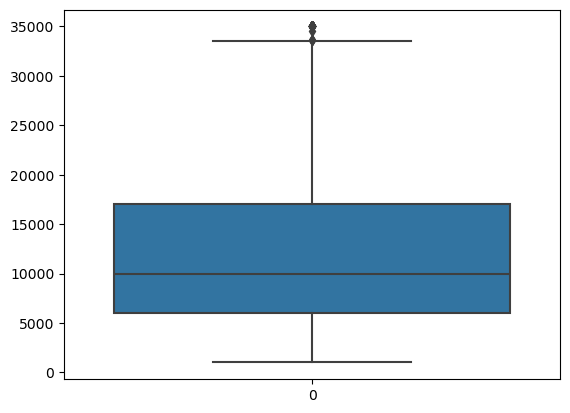

In [333]:
sns.boxplot(Loan_Data['Amt_Rqstd'])

<Axes: >

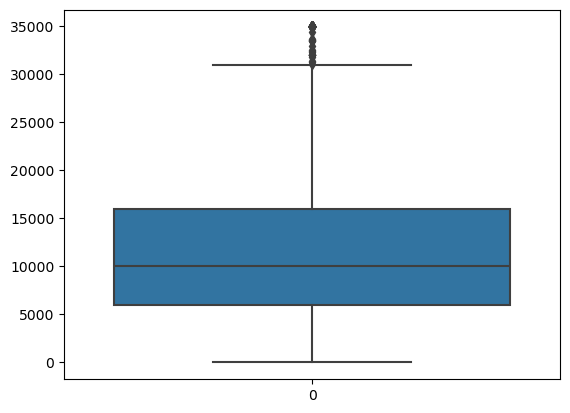

In [334]:
sns.boxplot(Loan_Data['Amt_Invstd'])

<Axes: >

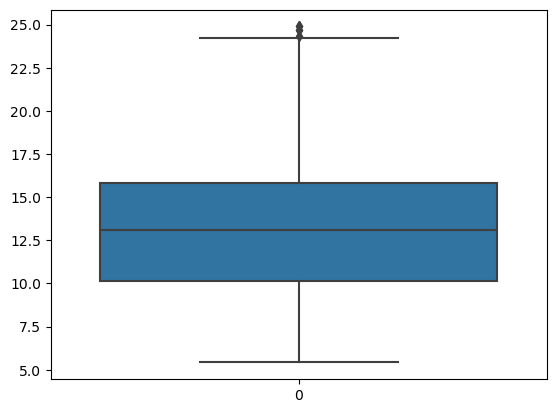

In [335]:
sns.boxplot(Loan_Data['Int_Rate'])

<Axes: >

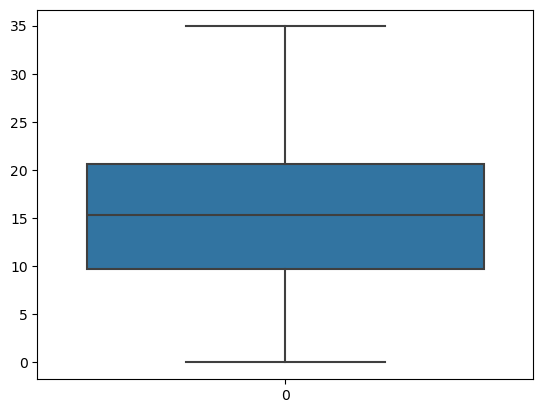

In [336]:
sns.boxplot(Loan_Data['Debt_2_ratio'])

<Axes: >

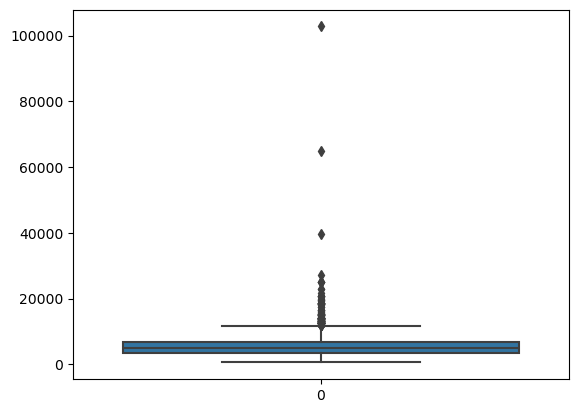

In [337]:
sns.boxplot(Loan_Data['Income'])

<Axes: >

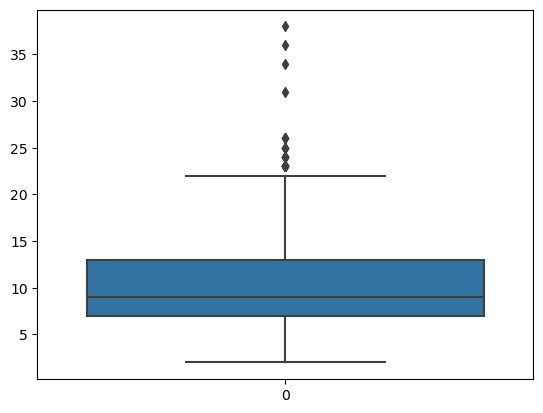

In [338]:
sns.boxplot(Loan_Data['Open_crdt_lne'])

<Axes: >

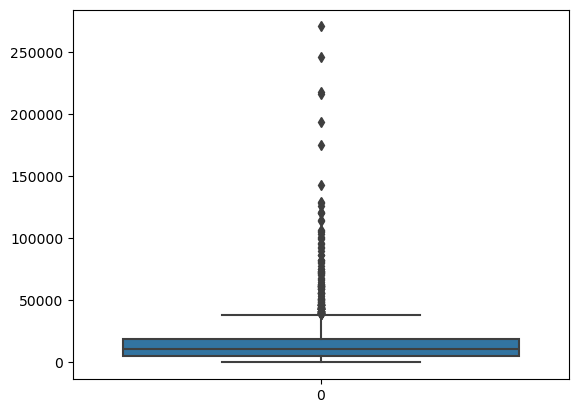

In [339]:
sns.boxplot(Loan_Data['Balance'])

<Axes: >

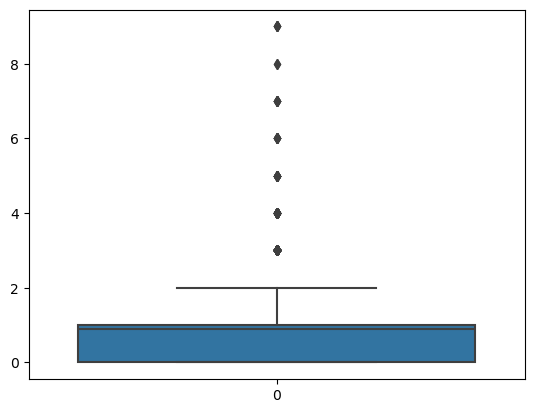

In [340]:
sns.boxplot(Loan_Data['Inquiries'])

<Axes: >

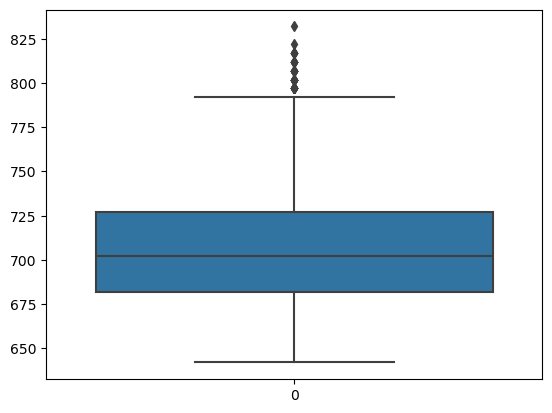

In [341]:
sns.boxplot(Loan_Data['F_score'])

In [342]:
for col in Loan_Data.columns:
        Loan_Data[col] = np.where(Loan_Data[col] > Loan_Data[col].quantile(0.95) ,
                                    Loan_Data[col].median(), Loan_Data[col])

<Axes: >

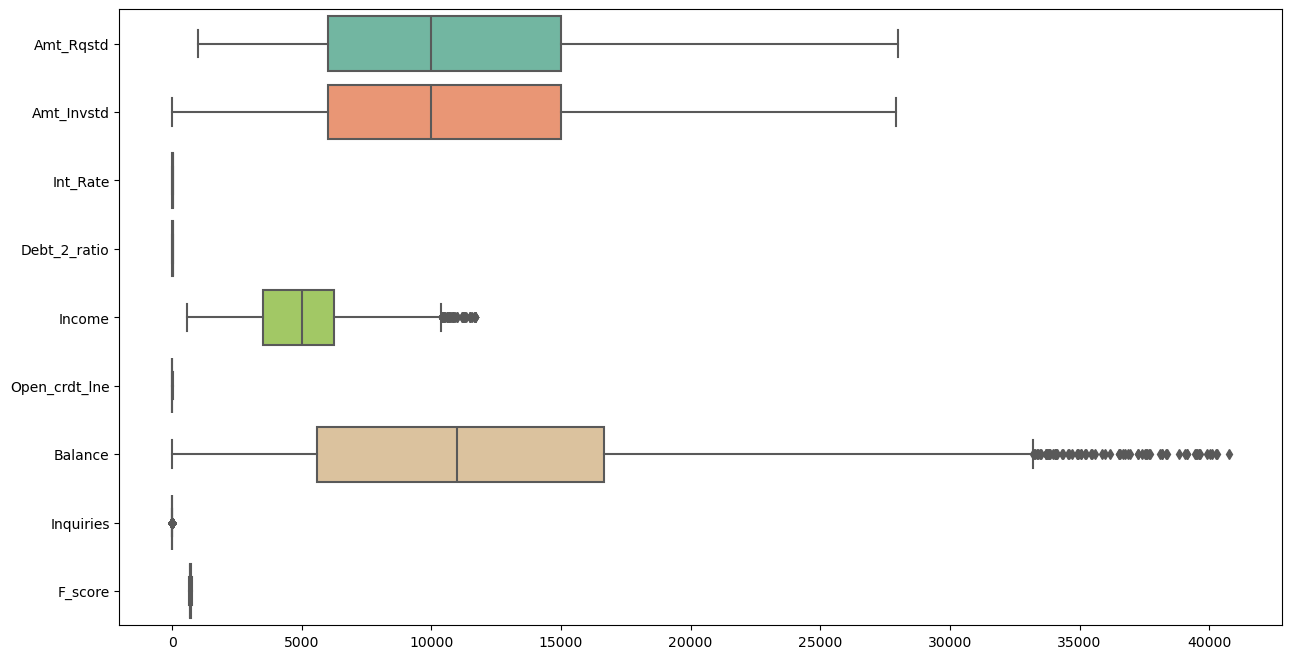

In [343]:
plt.figure(figsize=(15,8))
col_list = ['Amt_Rqstd','Amt_Invstd','Int_Rate','Debt_2_ratio','Income','Open_crdt_lne','Balance','Inquiries','F_score']
sns.boxplot(data=Loan_Data[col_list],orient="h",palette="Set2")

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 2000x1800 with 0 Axes>

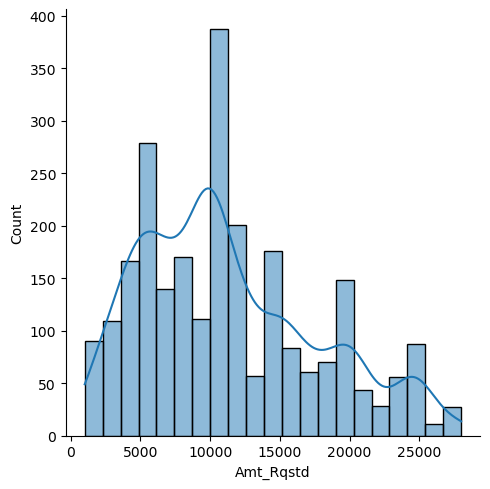

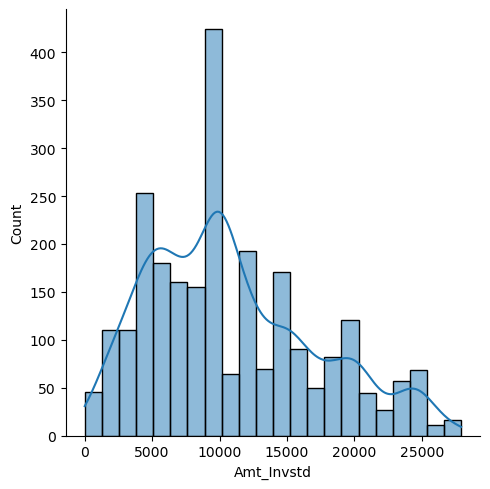

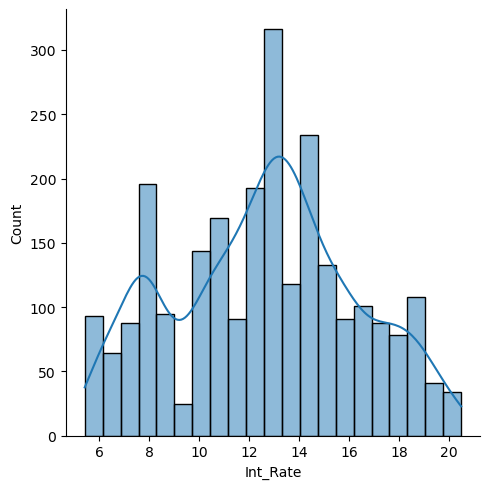

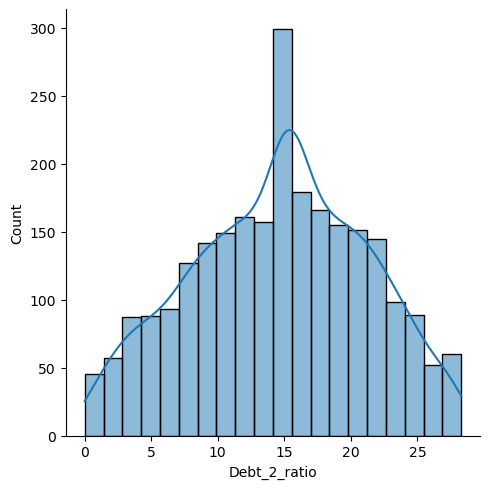

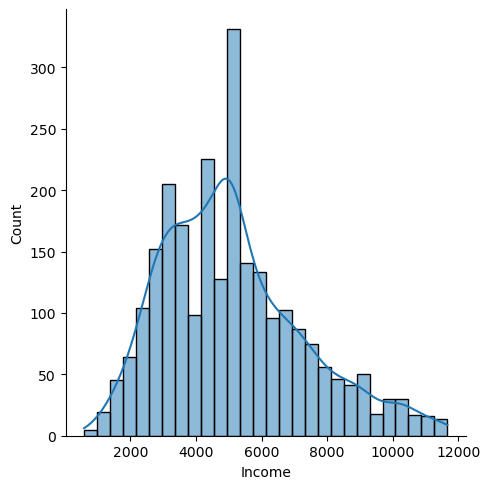

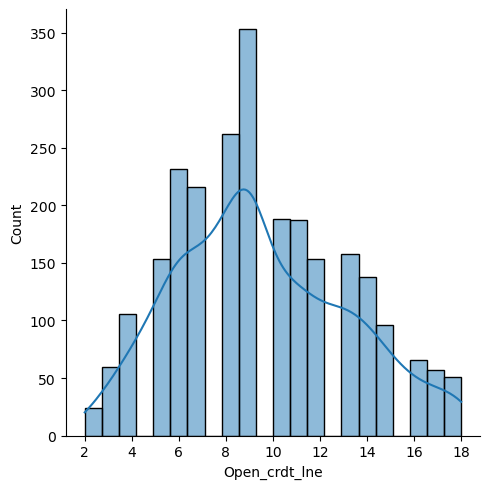

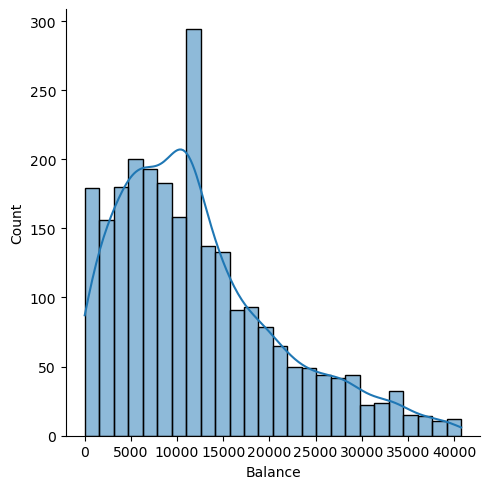

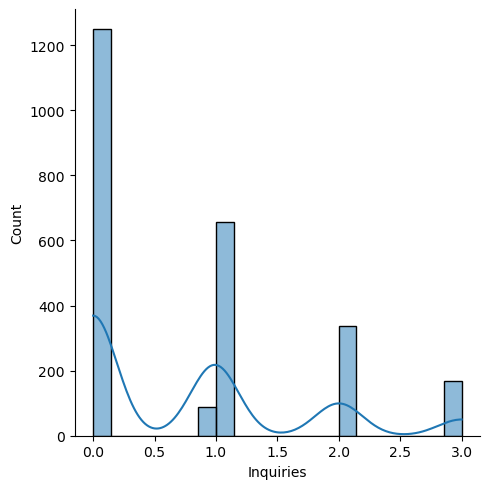

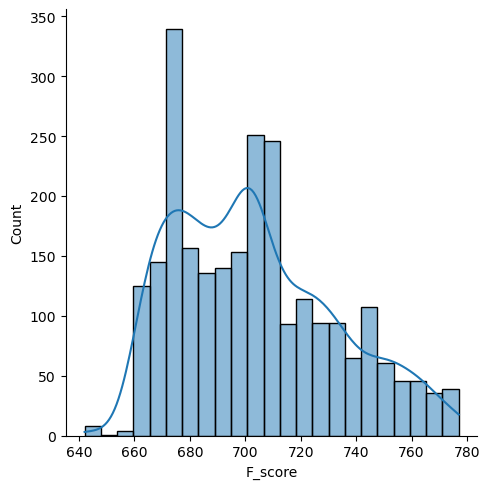

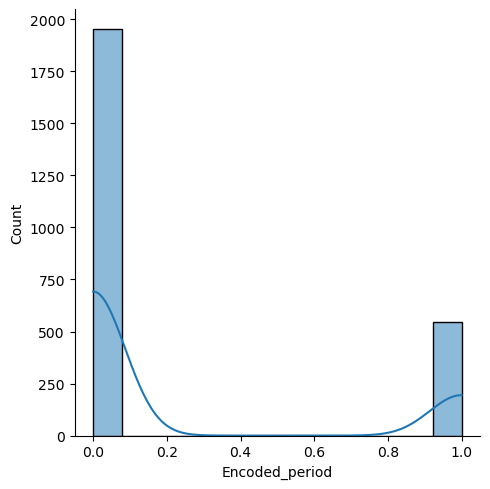

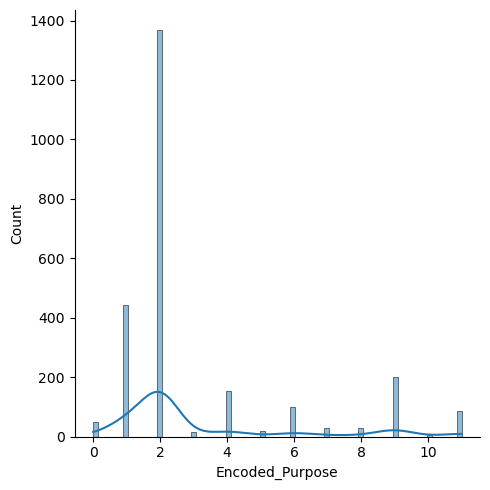

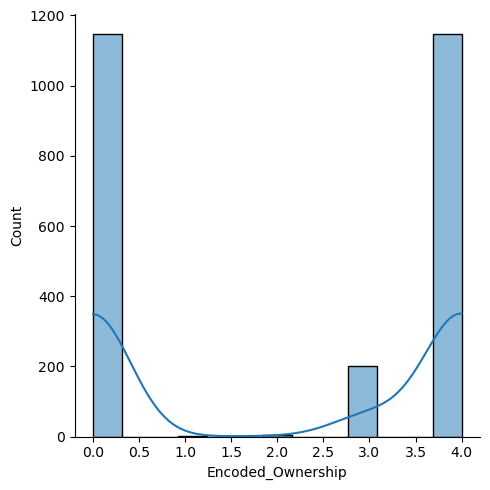

In [344]:
plt.figure(figsize=(20,18))
for column in Loan_Data.columns:
    if Loan_Data[column].dtype == float and int:
        sns.displot(data=Loan_Data[column],kde=True)

<Axes: >

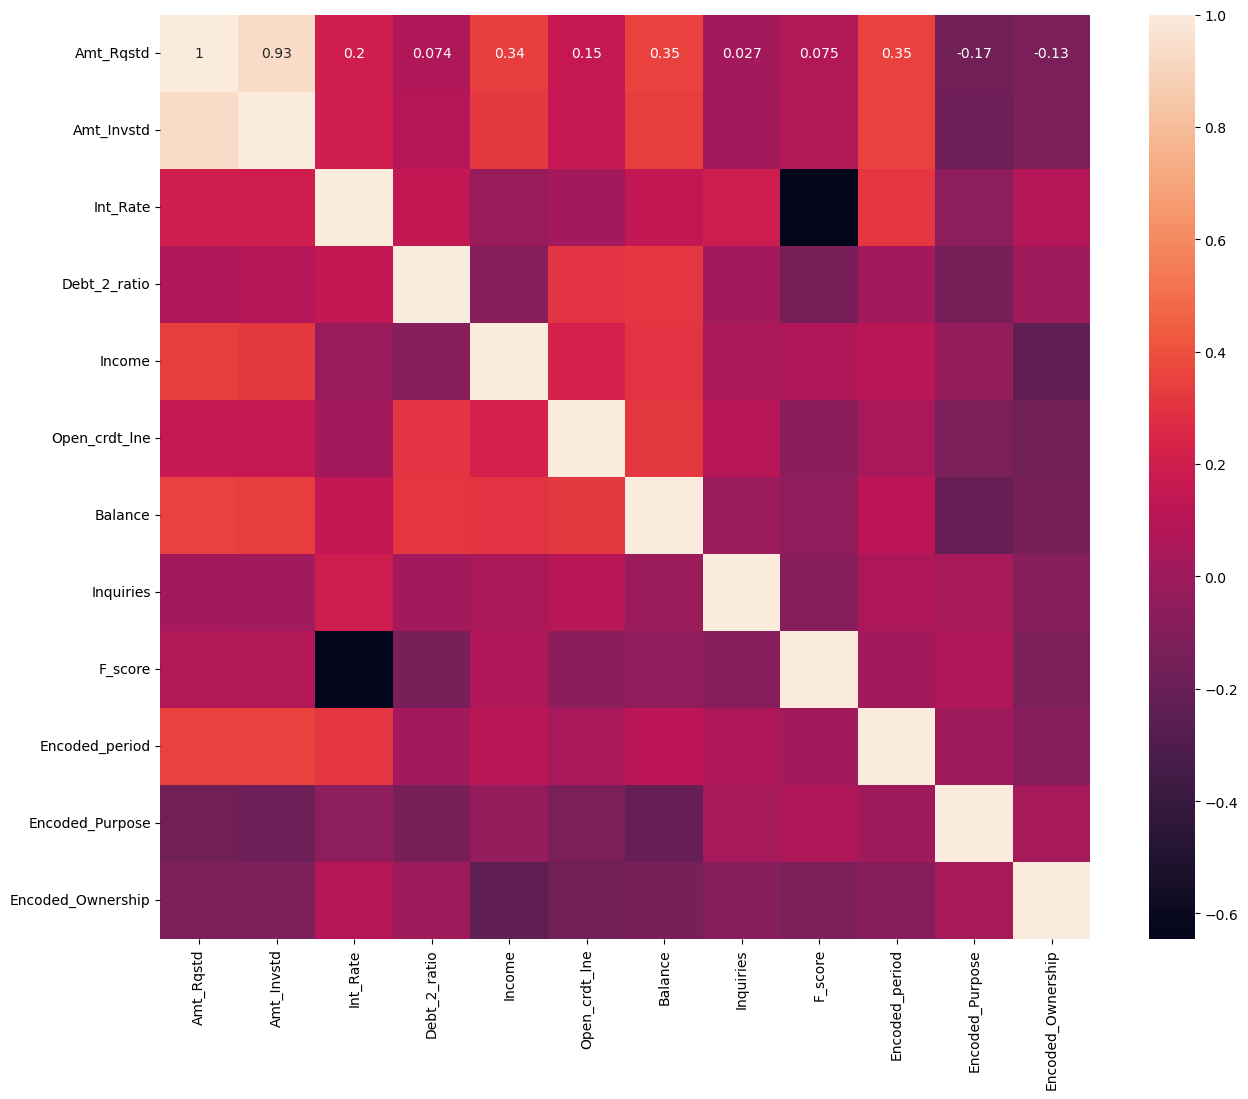

In [345]:
plt.figure(figsize=(15,12))
sns.heatmap(data=Loan_Data.corr(),annot=True)

# a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts) 

In [346]:
#Ho = Interest rate is independent upon loan amounts
#Ha = Interest rate is depentent upon loan amounts

# C.I. = 95
# P = 0.05

stats.spearmanr(Loan_Data.Int_Rate,Loan_Data.Amt_Invstd)

SignificanceResult(statistic=0.19036533494485616, pvalue=7.884007180728906e-22)

In [347]:
pvalue=7.884007180728906e-22

In [348]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

reject Ho


# b. Loan length is directly effecting intrest rate. 

In [349]:
## Ho = Loan length is independent upon Interest rate
#Ha = Loan length is depentent upon Interest rate

# C.I. = 95
# P = 0.05

stats.pearsonr(Loan_Data.Int_Rate,Loan_Data.Encoded_period)  

PearsonRResult(statistic=0.3119405172489035, pvalue=1.5033266281136357e-57)

In [350]:
pvalue=1.5033266281136357e-57

In [351]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

reject Ho


# c. The interest rate varies for different purposes of loans

In [352]:
S0 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 0,'Int_Rate']
S1 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 1,'Int_Rate']
S2 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 2,'Int_Rate']
S3 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 3,'Int_Rate']
S4 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 4,'Int_Rate']
S5 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 5,'Int_Rate']
S6 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 6,'Int_Rate']
S7 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 7,'Int_Rate']
S8 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 8,'Int_Rate']
S9 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 9,'Int_Rate']
S10 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 10,'Int_Rate']
S11 = Loan_Data.loc[Loan_Data.Encoded_Purpose == 11,'Int_Rate']


In [353]:
#Ho = Interest rate is independent upon purpose of loans
#Ha = Interest rate is depentent upon purpose of loans

# C.I. = 95
# P = 0.05

print(stats.f_oneway(S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11))

F_onewayResult(statistic=7.651340238883028, pvalue=4.0072097885339836e-13)


In [354]:
pvalue=4.0072097885339836e-13

In [355]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

reject Ho


## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [356]:
#Ho = FICO scores is independent upon Home Ownership
#Ha = FICO scores is depentent upon Home Ownership

# C.I. = 95
# P = 0.05

stats.spearmanr(Loan_Data.Encoded_Ownership,Loan_Data.F_score)

SignificanceResult(statistic=-0.11593577243658243, pvalue=6.11791215552012e-09)

In [357]:
pvalue=6.11791215552012e-09

In [358]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

reject Ho


##  BUSINESS PROBLEM-2 

In [359]:
Price_Quotes.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


In [360]:
Price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [361]:
Price_Quotes.isnull().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

##BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [362]:
#Ho = u = Xi
#Ha = u <> Xi

# C.I. = 95
# P = 0.05

stats.ttest_rel(Price_Quotes.Mary_Price,Price_Quotes.Barry_Price)

TtestResult(statistic=-2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [363]:
pvalue=0.02840588045242053

In [364]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

reject Ho


### BUSINESS PROBLEM-3

## BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [365]:
Treatment_Facility.head(2)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [366]:
Treatment_Facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [367]:
Treatment_Facility.isnull().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [368]:
Treatment_Facility.rename(columns={'VAR4':'TRFF(%)','VAR5':'CI(%)'},inplace=True)

In [369]:
Treatment_Facility.head(2)

,Month,Reengineer,Employee_Turnover,TRFF(%),CI(%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [370]:
Prior = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior','CI(%)']

Post = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post','CI(%)']

In [371]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.f_oneway(Prior,Post)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

In [372]:
pvalue=0.12091989189884142

In [373]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

fail to reject Ho


In [374]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.ttest_ind(Prior,Post)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)

In [375]:
 pvalue=0.12091989189884148

In [376]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

fail to reject Ho


## BUSINESS PROBLEM - 4

 ## BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring. 

In [377]:
Priority_Assessment.head(2)

,Days,Priority
0,3.3,High
1,7.9,Medium


In [378]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [379]:
High = Priority_Assessment.loc[Priority_Assessment.Priority == 'High','Days']
Medium = Priority_Assessment.loc[Priority_Assessment.Priority == 'Medium','Days']
Low = Priority_Assessment.loc[Priority_Assessment.Priority == 'Low','Days']

In [380]:
Priority_Assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


##if the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority 
#jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring

In [381]:
#Ho = u2 <= u1
#Ha = u2 > u1

# C.I. = 95
# P = 0.05

# Performing the statistical test
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [382]:
pvalue=0.16411459461716182

In [383]:
if pvalue > 0.05:
   print('fail to reject Ho')
else:
   print('reject Ho')

fail to reject Ho


## BUSINESS PROBLEM: 5

# BUSINESS PROBLEM: Use the survey results to address the following questions 
#  What is the overall level of customer satisfaction? 
#  What factors are linked to satisfaction? 
#  What is the demographic profile of Film on the Rocks patrons? 
#  In what media outlet(s) should the film series be advertised?

In [384]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [385]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [386]:
Films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [387]:
def gender (x):
    if x.Gender == 'Male':
        return '1'
    elif x.Gender == 'Female':
        return '2'
    else:
        return x.Gender
    

In [388]:
Films.Gender = Films.apply(gender,axis=1)

In [389]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [390]:
def Rel_status(x):
    if x.Marital_Status == 'Married':
        return '1'
    elif x.Marital_Status == 'Single':
        return '2'
    elif x.Marital_Status == 'Slngle' :
        return '2'
    else:
        return x.Marital_Status
        

In [391]:
Films.Marital_Status = Films.apply(Rel_status,axis=1)

In [392]:
for col in Films.columns:
    Films[col].fillna(Films[col].mode().values[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11688\4264146898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Films[col].fillna(Films[col].mode().values[0], inplace=True)


In [393]:
Films.drop(columns = '_rowstate_',inplace=True)

## What is the overall level of customer satisfaction?

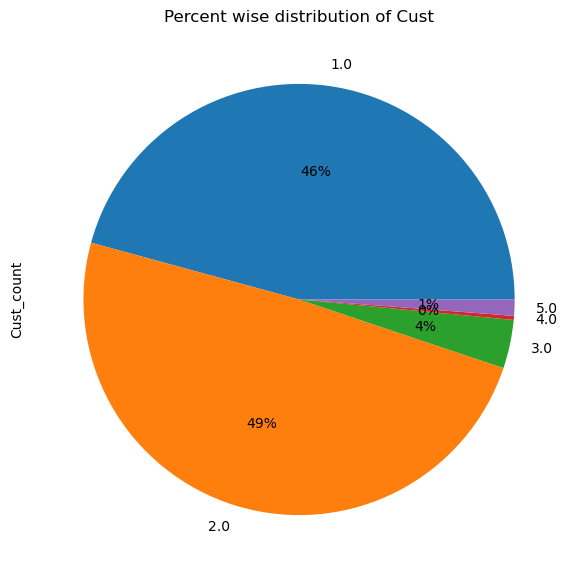

,Cust_count
Overall,
1.0,151
2.0,162
3.0,12
4.0,1
5.0,4


In [394]:
Cust_satisfaction = Films.groupby(by='Overall')[['Overall']].count()
Cust_satisfaction.rename(columns={'Overall':'Cust_count'},inplace=True)

Cust_satisfaction.Cust_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Percent wise distribution of Cust')

plt.show()
Cust_satisfaction


## What factors are linked to satisfaction?

In [395]:
Films.Sinage = Films.Sinage.astype('float')
Films.Parking = Films.Parking.astype('float')
Films.Clean = Films.Clean.astype('float')
Films.Overall = Films.Overall.astype('float')

In [396]:
Factors = Films[['Clean','Parking','Sinage','Overall']]

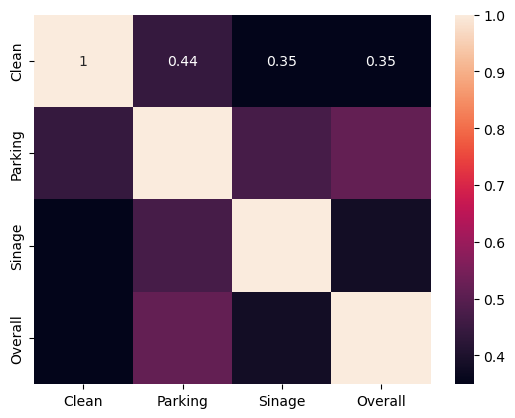

In [397]:
sns.heatmap(data=Factors.corr(),annot=True)
plt.show()

In [398]:
print(stats.f_oneway(Factors.Clean,Factors.Parking,Factors.Sinage,Factors.Overall))

F_onewayResult(statistic=7.286143154968725, pvalue=7.577748831602434e-05)


In [399]:
pvalue=7.577748831602434e-05

## What is the demographic profile of Film on the Rocks patrons?

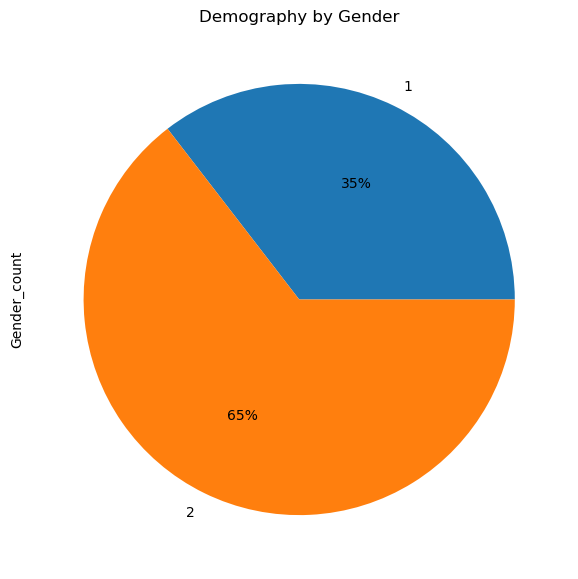

,Gender_count
Gender,
1,117
2,213


In [400]:
Gender_Demography = Films.groupby(by='Gender')[['Gender']].count()
Gender_Demography.rename(columns={'Gender':'Gender_count'},inplace=True)

Gender_Demography.Gender_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Gender')

plt.show()
Gender_Demography

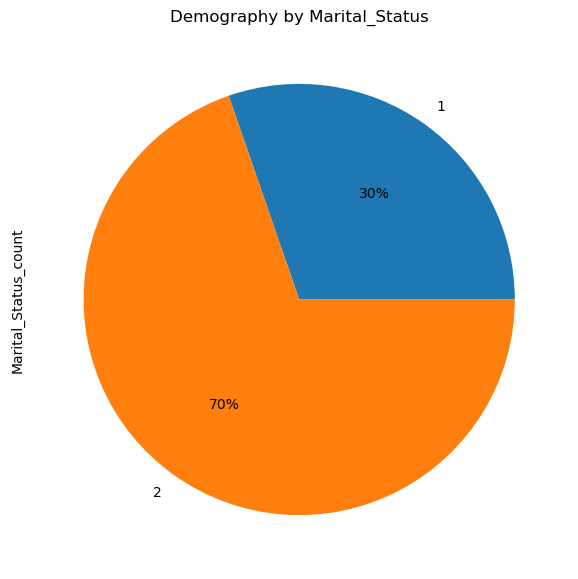

,Marital_Status_count
Marital_Status,
1,100
2,230


In [401]:
Marital_Status_Demography = Films.groupby(by='Marital_Status')[['Marital_Status']].count()
Marital_Status_Demography.rename(columns={'Marital_Status':'Marital_Status_count'},inplace=True)

Marital_Status_Demography.Marital_Status_count.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Marital_Status')

plt.show()
Marital_Status_Demography

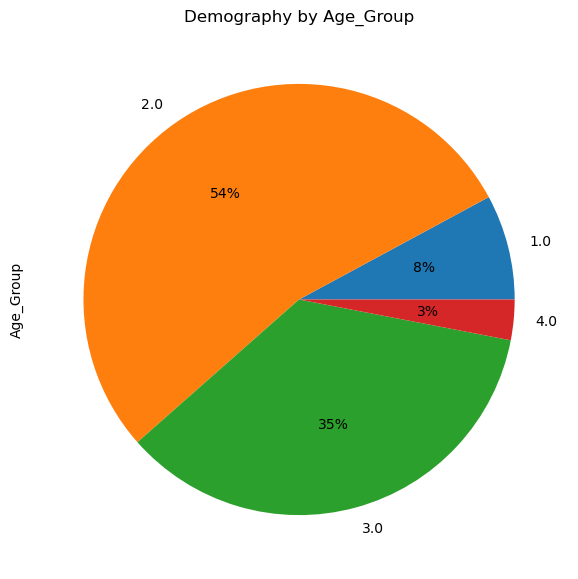

,Age_Group
Age,
1.0,26
2.0,177
3.0,117
4.0,10


In [402]:
Age_Demography = Films.groupby(by='Age')[['Age']].count()
Age_Demography.rename(columns={'Age':'Age_Group'},inplace=True)

Age_Demography.Age_Group.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Age_Group')

plt.show()
Age_Demography

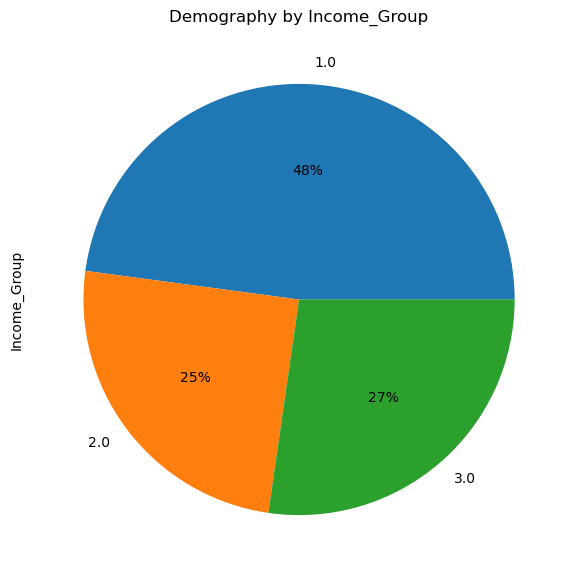

,Income_Group
Income,
1.0,158
2.0,82
3.0,90


In [403]:
Income_Demography = Films.groupby(by='Income')[['Income']].count()
Income_Demography.rename(columns={'Income':'Income_Group'},inplace=True)

Income_Demography.Income_Group.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Demography by Income_Group')

plt.show()
Income_Demography

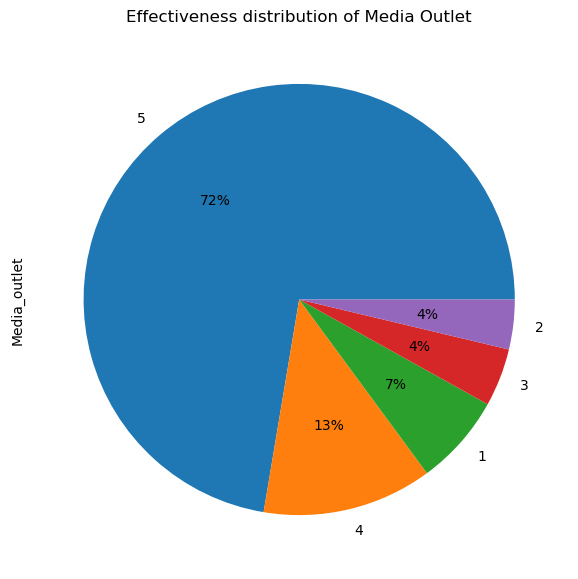

,Media_outlet
Hear_About,
5,233
4,41
1,22
3,14
2,12
"2,5",2
"3,4",2
"1,5",1
"3,5",1


In [404]:
Media_Demography = Films.groupby(by='Hear_About')[['Hear_About']].count()
Media_Demography.rename(columns={'Hear_About':'Media_outlet'},inplace=True)

Top_5 = Media_Demography['Media_outlet'].nlargest(5)

Top_5.plot(kind='pie',autopct="%1.0f%%",figsize=(8,7))
plt.title('Effectiveness distribution of Media Outlet')

plt.show()
Media_Demography.sort_values(by='Media_outlet',ascending=False)